In [5]:
#import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #plotting
import seaborn as sns #plotting

In [6]:
#import datasets
train_set = pd.read_csv('data/train.csv', index_col='PassengerId') #import train dataset
test_set = pd.read_csv('data/test.csv', index_col='PassengerId') #import test set
submission_set = pd.read_csv('data/sample_submission.csv') #import sample submission

In [7]:
#View top 5 rows
train_set.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [8]:
#View top 5 rows of test set
test_set.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
PassengerId,,,,,,,,,,,,
0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [9]:
test_set = test_set.reset_index()
submission_id = test_set['PassengerId'] #set ids for submission
test_set = test_set.set_index('PassengerId')

In [10]:
#View final submission expectation
submission_set.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


Data exploration analysis on the train set along with necessary preprocessing.

In [11]:
#Check data types, non-null values, and dataset shape
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB


In [12]:
#Further check null values 
train_set.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [13]:
#Fill NaN values.
def fill_nan(dataset):
    if 'Transported' in dataset.columns:
        dataset.drop('Transported', axis=1, inplace=True)
    else:
        pass

    for col in dataset.columns:
        if dataset[col].dtypes == 'object':
            dataset[col].fillna(dataset[col].mode()[0], inplace=True)
        else:
            dataset[col].fillna(dataset[col].mean(), inplace=True)
    return dataset
train_set_copy = train_set.copy()
train_set = fill_nan(train_set)
train_set['Transported'] = train_set_copy['Transported']

In [14]:
train_set.isnull().sum() #check null values again

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [15]:
#check duplicates
train_set.duplicated().sum()

0

In [16]:
#separate numerical from categorical features
def split_num_cat(dataset):
    num_set = dataset.select_dtypes(include=['float64', 'bool'])
    cat_set = dataset.select_dtypes(include=['object', 'bool'])
    return num_set, cat_set
num_set, cat_set = split_num_cat(train_set)

In [17]:
#check destribution statistics on numerical data
num_set.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.339054,659.739364,1594.434978,597.417440,1124.675871,1133.259049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,78.000000,118.000000,45.000000,89.000000,71.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


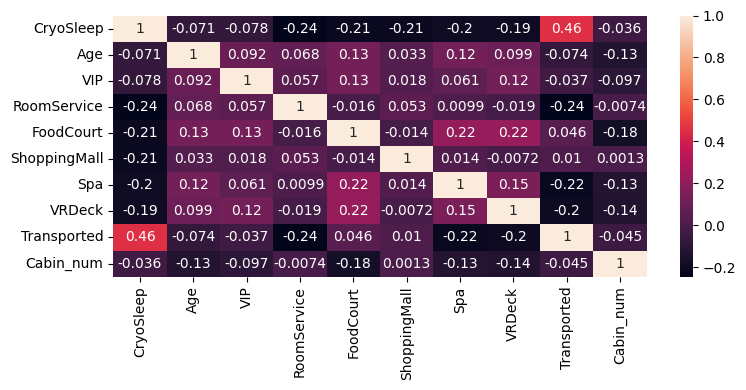

In [48]:
#check correlation among numerical data
corr = num_set.corr() #check correlation
plt.figure(figsize=(8, 4)) #figure size
sns.heatmap(corr, annot=True) #visualize correlation
plt.tight_layout()
plt.savefig('graphs/train_features_corr.png')
plt.show()

We don't seem to have extremely correlated features, so all the current numerical features will be used for training. 

In [19]:
#check statistics for categorical data
cat_set.describe()

,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
count,8693,8693,8693,8693,8693,8693,8693
unique,3,2,6560,3,2,8473,2
top,Earth,False,G/734/S,TRAPPIST-1e,False,Alraium Disivering,True
freq,4803,5656,207,6097,8494,202,4378


In [20]:
#drop name and split cabin
def clean_features(dataset):
    dataset = dataset.drop('Name', axis=1) #drop name since it's unnecessary
    dataset[['Deck', 'Cabin_num', 'Cabin_side']] = dataset['Cabin'].str.split('/', expand=True) #split cabin
    dataset = dataset.drop('Cabin', axis=1) #drop cabin column
    dataset['Cabin_num'] = pd.to_numeric(dataset['Cabin_num']) #change to numeric
    return dataset
cat_set = clean_features(cat_set)

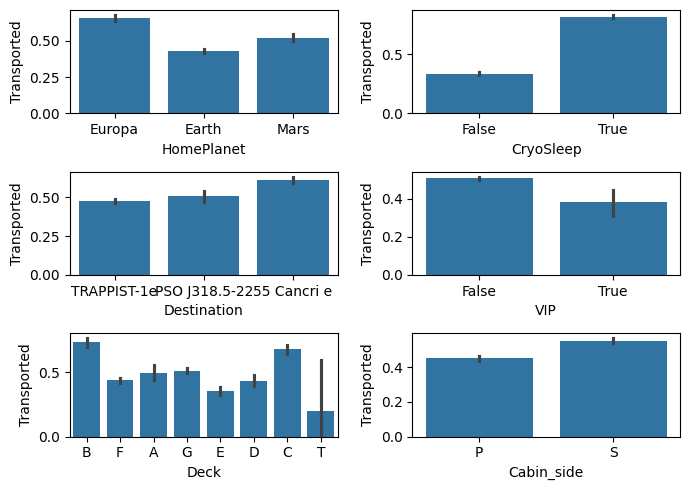

In [49]:
#Check how each categorical feature relates to the target. 
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(7, 5))
sns.barplot(data=cat_set, x='HomePlanet', y='Transported', ax=ax[0, 0])
sns.barplot(data=cat_set, x='CryoSleep', y='Transported', ax=ax[0,1])
sns.barplot(data=cat_set, x='Destination', y='Transported', ax=ax[1, 0])
sns.barplot(data=cat_set, x='VIP', y='Transported', ax=ax[1, 1])
sns.barplot(data=cat_set, x='Deck', y='Transported', ax=ax[2, 0])
sns.barplot(data=cat_set, x='Cabin_side', y='Transported', ax=ax[2, 1])
plt.tight_layout()
plt.savefig('graphs/categorical_features_vs_target.png')

Preprocessing and preparing datasets for training a model. 

In [22]:
num_set.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
PassengerId,,,,,,,,,
0001_01,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False
0002_01,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True
0003_01,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
0003_02,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
0004_01,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [23]:
cat_set.head()

,HomePlanet,CryoSleep,Destination,VIP,Transported,Deck,Cabin_num,Cabin_side
PassengerId,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,False,False,B,0,P
0002_01,Earth,False,TRAPPIST-1e,False,True,F,0,S
0003_01,Europa,False,TRAPPIST-1e,True,False,A,0,S
0003_02,Europa,False,TRAPPIST-1e,False,False,A,0,S
0004_01,Earth,False,TRAPPIST-1e,False,True,F,1,S


In [24]:
#Prepare data for preprocessing
y = train_set['Transported'].astype(int).values

def preprocess_ready(nums, cats):
    nums['Cabin_num'] = cats['Cabin_num']
    num_X = nums.drop('Transported', axis=1)
    cat_X = cats.drop(['Transported', 'Cabin_num'], axis=1)
    return cat_X, num_X
cat_X, num_X = preprocess_ready(num_set, cat_set)

#version for test set
def preprocess_ready2(nums, cats):
    nums['Cabin_num'] = cats['Cabin_num']
    cat_X = cats.drop('Cabin_num', axis=1)
    return cat_X, nums

In [26]:
#Scale numerical data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

def scale_numericals(dataset):
    scaler.fit(dataset)
    scaled_numX = scaler.transform(dataset)
    return scaled_numX
scaled_numX = scale_numericals(num_X)

In [27]:
#encode categorical data
def encode_categoricals(dataset):
    cat_cols = dataset.columns
    encoded_catX = pd.get_dummies(dataset, columns=cat_cols, dtype=int).values
    return encoded_catX
encoded_catX = encode_categoricals(cat_X)

In [28]:
#put together variables for a full training set
def reunite_set(nums, cats):
    X = np.concatenate((nums, cats), axis=1)
    return X
X = reunite_set(scaled_numX, encoded_catX)

In [29]:
np.isnan(X).sum()

0

Train and Validate a model

In [30]:
#import necessary libraries
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [31]:
#train and test a logistic regression model
kfolds = KFold(n_splits=3, shuffle=True, random_state=42)
regressor = LogisticRegression()
scores = cross_val_score(regressor, X, y, cv=kfolds, scoring='accuracy')

In [32]:
print(scores) #print scores

[0.78122843 0.79365079 0.79875734]


In [33]:
#fitting our dataset on a Logistic regression 
regressor.fit(X,y)

LogisticRegression()

In [34]:
test_set.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
PassengerId,,,,,,,,,,,,
0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [35]:
#prepare test set for prediction
test_set = fill_nan(test_set) #fill nan values with zero
numericals, categoricals = split_num_cat(test_set) #split into numerical and categorical values
numericals, categoricals = split_num_cat(test_set) #split into numerical and categorical values
categoricals = clean_features(categoricals) #cleaned categoricals
categoricals, numericals = preprocess_ready2(numericals, categoricals) #preprocess ready
scaled_numX = scale_numericals(numericals) #scale num values
encoded_catX = encode_categoricals(categoricals) #encode cat values
test_set = reunite_set(scaled_numX, encoded_catX)

In [36]:
np.isnan(test_set).sum() #check null values in the test set

0

In [37]:
#make a prediction
predictions = regressor.predict(test_set)
n_predictions = (predictions > 0.5).astype(bool)
submission = pd.DataFrame({"PassengerId": submission_id, 
                          "Transported": n_predictions.squeeze()})

In [38]:
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [41]:
#prepare sample submission
sample_submission_df = pd.read_csv('data/sample_submission.csv')
sample_submission_df['Transported'] = n_predictions
sample_submission_df.to_csv('data/submission.csv', index=False)
sample_submission_df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


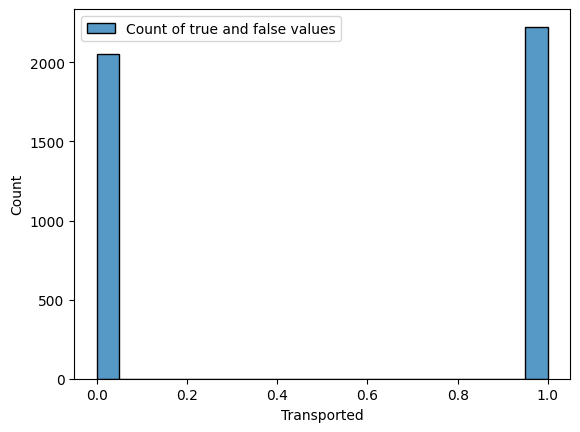

In [51]:
#visualize output submission
sns.histplot(sample_submission_df['Transported'], bins=20, label='Count of true and false values')
plt.legend()
plt.savefig('graphs/predicted_transports.png')
plt.show()